In [3]:
import sys
import pandas as pd 
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import IPython
import sklearn 
import xgboost as xgb
import catboost 

In [2]:
import sys
!{sys.executable} -m pip install catboost


  Obtaining dependency information for catboost from https://files.pythonhosted.org/packages/0e/91/e60d80ce72e5fce94fa672908b1f7ffb881701027130b7d637bb6b6561a4/catboost-1.2.8-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for graphviz from https://files.pythonhosted.org/packages/91/4c/e0ce1ef95d4000ebc1c11801f9b944fa5910ecc15b5e351865763d8657f8/graphviz-0.21-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/102.5 MB 438.9 kB/s eta 0:03:54
   ---------------------------------------- 0.1/102.5 MB 585.1 kB/s eta 0:02:55
   ---------------------------------------- 0.1/102.5 MB 393.8 kB/s eta 0:04:20
   ---------------------------------------- 0.1/102.5 MB 481.4 kB/s eta 0:03:33
   ---------------------------------------- 0.2/102.5 MB 

In [34]:
from sklearn.model_selection import train_test_split
X = pd.read_csv("../data/preprocessed/training.data.csv")
y = pd.read_csv("../data/preprocessed/test.data.csv")
y.drop(columns=["Unnamed: 0"], inplace=True)
X.drop(columns=["Unnamed: 0"], inplace=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [35]:
num_cols = [
    "avg_temp",
    "average_rain_fall_mm_per_year",
    "pesticides_tonnes",
    "Year",
]
cat_cols = ["Area_ISO3", "Item"] 


In [ ]:
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

train_pool = Pool(
    X_train, y_train,
    cat_features=cat_cols  
)
valid_pool = Pool(
    X_test, y_test,
    cat_features=cat_cols
)

model = CatBoostRegressor(
    iterations=3000,            
    learning_rate=0.03,
    depth=8,
    loss_function="RMSE",
    eval_metric="RMSE",
    random_seed=42,
    od_type="Iter",             
    od_wait=200,                
    verbose=200
)

model.fit(train_pool, eval_set=valid_pool)


0:	learn: 8.3006907	test: 8.3220153	best: 8.3220153 (0)	total: 41.9ms	remaining: 2m 5s
200:	learn: 2.1654225	test: 2.1252550	best: 2.1252550 (200)	total: 8.18s	remaining: 1m 53s
400:	learn: 1.7326395	test: 1.7577723	best: 1.7577723 (400)	total: 18.2s	remaining: 1m 57s
600:	learn: 1.5006673	test: 1.5727913	best: 1.5727913 (600)	total: 28.8s	remaining: 1m 54s
800:	learn: 1.3592205	test: 1.4726582	best: 1.4726582 (800)	total: 39.2s	remaining: 1m 47s
1000:	learn: 1.2697235	test: 1.4142591	best: 1.4142591 (1000)	total: 47.6s	remaining: 1m 34s
1200:	learn: 1.1859324	test: 1.3563303	best: 1.3563303 (1200)	total: 55.8s	remaining: 1m 23s
1400:	learn: 1.1201820	test: 1.3158981	best: 1.3158981 (1400)	total: 1m 5s	remaining: 1m 15s
1600:	learn: 1.0639022	test: 1.2820412	best: 1.2820047 (1599)	total: 1m 14s	remaining: 1m 5s
1800:	learn: 1.0166201	test: 1.2552316	best: 1.2552316 (1800)	total: 1m 22s	remaining: 54.6s
2000:	learn: 0.9767456	test: 1.2340762	best: 1.2340762 (2000)	total: 1m 30s	remainin

In [38]:
y_test.head()

,t/ha_yield
25564,6.9220
18113,2.0000
25607,5.1206
6815,16.6986
18144,5.6319


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_true = y_test.squeeze()

pred = model.predict(valid_pool)

mae  = mean_absolute_error(y_true, pred)
rmse = mean_squared_error(y_true, pred, squared=False)
mape = np.mean(np.abs((y_true - pred) / np.maximum(1e-9, y_true))) * 100
r2   = r2_score(y_true, pred)


print(f"MAE:  {mae:.3f} т/га")
print(f"RMSE: {rmse:.3f} т/га")
print(f"MAPE: {mape:.2f}%")
print(f"R²:   {r2:.3f}")


MAE:  0.616 т/га
RMSE: 1.157 т/га
MAPE: 14.67%
R²:   0.982


In [49]:
results = pd.DataFrame({
    "y_true": y_true.values,   # реальные значения
    "y_pred": pred             # предсказания
})

print(results.head(20))  # первые 20 строк


     y_true     y_pred
0    6.9220   7.494544
1    2.0000   1.386326
2    5.1206   4.933568
3   16.6986  18.435257
4    5.6319   5.333115
5    2.6163   2.920443
6    3.0708   2.878409
7   10.9771  10.714225
8   24.1650  22.953641
9    4.7500   4.923099
10   1.4614   1.268783
11   6.2061   5.830589
12   0.3332   0.636270
13   2.7105   2.400198
14   1.2512   1.732586
15   5.3362   4.422758
16  15.5782  10.980974
17  15.8256  15.918739
18   2.6937   2.427711
19   3.2222   3.946366


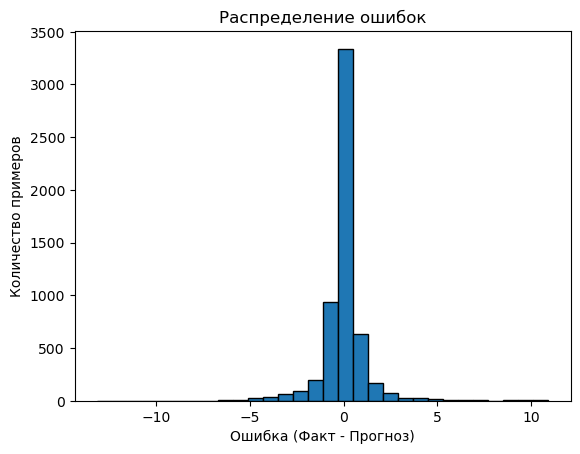

In [68]:
import matplotlib.pyplot as plt

plt.hist(y_true - pred, bins=30, edgecolor="black")
plt.title("Распределение ошибок")
plt.xlabel("Ошибка (Факт - Прогноз)")
plt.ylabel("Количество примеров")
plt.show()


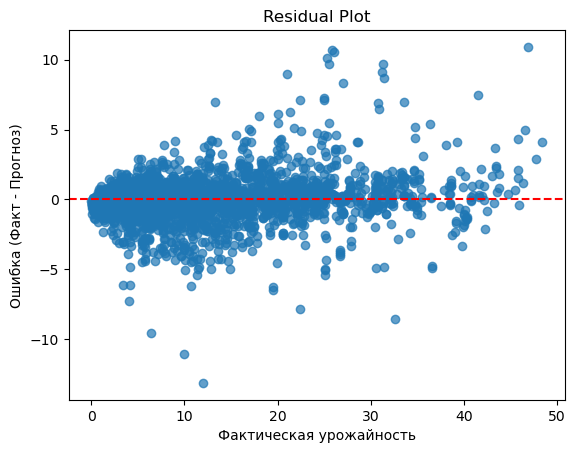

In [69]:
plt.scatter(y_true, y_true - pred, alpha=0.7)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Фактическая урожайность")
plt.ylabel("Ошибка (Факт - Прогноз)")
plt.title("Residual Plot")
plt.show()
